In [1]:
# AUTHOR Christian Dansereau 2016

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy.io
import os
import nibabel as nib
from nibabel.affines import apply_affine
from nilearn import plotting
import numpy.linalg as npl

# Load data

In [3]:
#seed_data = pd.read_csv('20160128_AD_Decrease_Meta_Christian.csv')

template_036= nib.load('./template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale036.nii.gz')
template_020= nib.load('./template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale020.nii.gz')
template_012= nib.load('./template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale012.nii.gz')
template_007= nib.load('./template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale007.nii.gz')

scale = '7'

if scale == '7':
    template = template_007
else:
    template = template_036

#seed_data = pd.read_csv('20160205_AD_Decrease_Meta_Final.csv')
#seed_data = pd.read_csv('20160129_AD_Increase_Meta_Final.csv')

#seed_data = pd.read_csv('20160205_MCI_Decrease_Meta_Final.csv')
#seed_data = pd.read_csv('20160204_MCI_Increase_Meta_Final.csv')

seed_data = pd.read_csv('20160205_ADMCI_Decrease_Meta_Final.csv')
#seed_data = pd.read_csv('20160129_ADMCI_Increase_Meta_Final.csv')

# ******************* #

#output_stats = 'AD_decrease_scale'+scale+'_stats.mat'
#output_vol   = 'AD_decrease_ratio'+scale+'_vol.nii.gz'
#output_stats = 'AD_increase_scale'+scale+'_stats.mat'
#output_vol   = 'AD_increase_ratio_scale'+scale+'_vol.nii.gz'

#output_stats = 'MCI_decrease_scale'+scale+'_stats.mat'
#output_vol   = 'MCI_decrease_ratio_scale'+scale+'_vol.nii.gz'
#output_stats = 'MCI_increase_scale'+scale+'_stats.mat'
#output_vol   = 'MCI_increase_ratio_scale'+scale+'_vol.nii.gz'

output_stats = 'ADMCI_decrease_scale'+scale+'_stats.mat'
output_vol   = 'ADMCI_decrease_ratio_scale'+scale+'_vol.nii.gz'
#output_stats = 'ADMCI_increase_scale'+scale+'_stats.mat'
#output_vol   = 'ADMCI_increase_ratio_scale'+scale+'_vol.nii.gz'

In [4]:
seed_data

,PMID,Author,Year,subjects,x,y,z,Contrast,Direction,Unnamed: 9
0,17133390,Wang,2007,28,-6,-55,5,ADMCI,Decrease,NaN
1,17133390,Wang,2007,28,-6,-57,28,ADMCI,Decrease,NaN
2,17133390,Wang,2007,28,-6,-57,19,ADMCI,Decrease,NaN
3,17133390,Wang,2007,28,3,-62,50,ADMCI,Decrease,NaN
4,17133390,Wang,2007,28,15,-55,14,ADMCI,Decrease,NaN
5,17133390,Wang,2007,28,9,-63,22,ADMCI,Decrease,NaN
6,17133390,Wang,2007,28,50,-48,22,ADMCI,Decrease,NaN
7,17133390,Wang,2007,28,-27,20,57,ADMCI,Decrease,NaN
8,17133390,Wang,2007,28,-30,29,31,ADMCI,Decrease,NaN
9,18786570,Zhang,2009,32,6,55,47,ADMCI,Decrease,NaN


## Get the number of coordinates reported for each network

In [124]:
from numpy.linalg import norm
# find the closest network to the coordo
def get_nearest_net(template,world_coor):
    import pdb; pdb.set_trace()
    list_coord = np.array(np.where(template.get_data()>0))
    mni_coord = apply_affine(template.get_affine(),list_coord.T)
    distances = norm(mni_coord-np.array(world_coor),axis=1)
    #print distances.shape
    idx_nearest_net = np.where(distances == np.min(distances))[0][0]
    import pdb; pdb.set_trace()
    return int(template.get_data()[list_coord[:,idx_nearest_net][0],list_coord[:,idx_nearest_net][1],list_coord[:,idx_nearest_net][2]])

def get_nearest_voxel(template,world_coor):
    list_coord = np.array(np.where(template.get_data()>0))
    mni_coord = apply_affine(template.get_affine(),list_coord.T)
    distances = norm(mni_coord-np.array(world_coor),axis=1)
    #print distances.shape
    idx_nearest_net = np.where(distances == np.min(distances))[0][0]
    #return int(template.get_data()[list_coord[:,idx_nearest_net][0],list_coord[:,idx_nearest_net][1],list_coord[:,idx_nearest_net][2]])
    #return mni_coord[:,idx_nearest_net][0],mni_coord[:,idx_nearest_net][1],mni_coord[:,idx_nearest_net][2]
    return mni_coord[idx_nearest_net,:]

"""
Step 1: get nearest voxel
Step 2: smooth with gaussian
Step 3: compute networks with weights rather than binary (i.e. pdf rather than discrete assignment)
   * step 3 requires a threshold that we consider "0" to be.
"""


############### below is new

def get_nearest_smoothed_net(template, world_coor, threshold=1e-5):
    """
    For each coordinate, smooth the observation and compute the probability
    of region membership for each region in the template.
    """
#     print((template.get_data().shape, world_coor))
    world_matrix = np.zeros(template.get_data().shape)
    w = world_coor
    world_matrix[w[0], w[1], w[2]] = 1
    world_matrix_smoothed = smooth_matrix(world_matrix)
    world_matrix_smoothed[np.where(world_matrix_smoothed < threshold)] = 0

    regions = np.unique(template.get_data())
    net_fracts = []
    for idx, region in enumerate(regions):
        if idx == 0 and int(region) == 0:
            temp_plate = template.get_data()
            temp_plate = 1.0*(temp_plate == region)
        else:
            temp_plate = template.get_data()
            temp_plate = 1.0*(temp_plate == region)
        temp_fracts = np.sum(np.multiply(world_matrix_smoothed, temp_plate))
        
        net_fracts += [temp_fracts]
    net_fracts = np.array(net_fracts)
    net_fracts = net_fracts / np.linalg.norm(net_fracts, ord=1)
    if np.isnan(net_fracts[0]):
        net_fracts = np.zeros(len(regions))
        net_fracts[0] = 1

    return list(net_fracts)

def plot_matrix(data, clim=(0, 1)):
    """
    Takes any matrix and plots it for visual inspection.
    Default colour range is 0-1, can be over-written by setting
    "clim."
    """
    try:
        import matplotlib.pyplot as plt
        %matplotlib inline
    except:
        print('Failed to import Matplotlib ??')
        return -1
    
    plt.imshow(data, interpolation='none')
    plt.colorbar()
    plt.clim(clim)
    plt.show()

def smooth_matrix(data, sigma=25):
    """
    Takes a matrix and applies a Gaussian Kernel smoothing
    function. Default sigma is 25, can be over-written by
    setting the "sigma" variable.
    """
    try:
        import scipy as sp
    except:
        print('Failed to import scipy ??')
        return -1

    return sp.ndimage.filters.gaussian_filter(data, sigma)

############# above is new


#get_nearest_net(template,[-15,-10,-10])
# Convert from world MNI space to the EPI voxel space
def get_world2vox(template, mni_coord):
    return np.round(apply_affine(npl.inv(template.get_affine()),mni_coord)+[1])
    
network_votes = np.zeros((np.max(template.get_data().flatten()),1))[:,0]
# network_votes

# get the voxel coordinates of the MNI seeds
mni_space_targets = seed_data[['x','y','z']].values
vox_corrd = get_world2vox(template,mni_space_targets)
votes = []
n_outofbrain=0
for i in range(vox_corrd.shape[0]):
    net_class = template.get_data()[vox_corrd[i,0],vox_corrd[i,1],vox_corrd[i,2]]
    if net_class==0:
        n_outofbrain+=1
        votes.append(get_nearest_smoothed_net(template,(vox_corrd[i,0],vox_corrd[i,1],vox_corrd[i,2])))
    else:
        tmp = np.zeros(len(np.unique(template.get_data())))
        tmp[int(net_class)] = 1
        votes.append(tmp)

print len(votes)
print('Out of brain coordinates: '+ str(n_outofbrain))
votes = np.array(votes)

# take one vote for each study only
uni_pmid = np.unique(seed_data['PMID'])
votes.shape
frequency_votes=np.zeros((len(uni_pmid),len(network_votes)))
#for i in range(len(uni_pmid)):
#    frequency_votes = np.hstack((frequency_votes,np.unique(votes[(seed_data['PMID']==uni_pmid[i]).values])))
for i in range(len(uni_pmid)):
    aa = np.array(votes[(seed_data['PMID']==uni_pmid[i]).values])
    frequency_votes[i, :] = np.mean(aa, axis=0)[1:] # discarding background

# print frequency_votes

# compile the stats for each network
#for i in range(1,len(network_votes)+1):
#    network_votes[i-1] = np.mean(frequency_votes==i)
network_votes = np.mean(frequency_votes,axis=0)
print network_votes
#vox_corrd[np.array(votes)==5,:]

312
Out of brain coordinates: 49
[ 0.00791171  0.07220145  0.02279848  0.09365519  0.31994783  0.23830698
  0.12062424]


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:105: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:114: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [118]:
frequency_votes.shape

(28, 7)

In [6]:
get_nearest_net(template,[-24,-10, 22])

get_nearest_voxel(template,[-24,-10, 22])

array([-21., -10.,  22.])

In [7]:
print '#AD<HC'
print '#15:    48.0 -12.0 66.0'
print get_nearest_voxel(template,[48,-12, 66])
print '#34:    50.0 0 61.0'
print get_nearest_voxel(template,[50,0, 61])
print '#35:    48.0 -12.0 66.0'
print get_nearest_voxel(template,[48,-12, 66])
print '#46:    0 -96.0 28.0'
print get_nearest_voxel(template,[0,-96, 28])
print '#52:    -4.510000228881836 13.970000267028809 -30.84000015258789'
print get_nearest_voxel(template,[-4.510000228881836,13.970000267028809, -30.84000015258789])

print 'AD>HC'
print '#5:    57.0 42.0 24.0'
print get_nearest_voxel(template,[57,42, 24])
print '#105:    45.0 55.0 31.0'
print get_nearest_voxel(template,[45,55, 31])

#AD<HC
#15:    48.0 -12.0 66.0
[ 45. -13.  64.]
#34:    50.0 0 61.0
[ 48.  -4.  58.]
#35:    48.0 -12.0 66.0
[ 45. -13.  64.]
#46:    0 -96.0 28.0
[  3. -94.  28.]
#52:    -4.510000228881836 13.970000267028809 -30.84000015258789
[  0.  17. -23.]
AD>HC
#5:    57.0 42.0 24.0
[ 51.  38.  22.]
#105:    45.0 55.0 31.0
[ 39.  50.  28.]


In [8]:
print 'AD decrease'
print '#10:    6.0 55.0 47.0'
print 'MNI coord',get_nearest_voxel(template,[6.0, 55.0, 47.0])
print '#20:    -22.0 -70.0 60.0'
print 'MNI coord',get_nearest_voxel(template,[-22.0, -70.0, 60.0])
print '#108:    30.0 -94.0 20.0'
print 'MNI coord',get_nearest_voxel(template,[30.0, -94.0, 20.0])
print 'AD increase'
print '#2:    -45.0 33.0 48.0'
print 'MNI coord',get_nearest_voxel(template,[-45.0, 33.0, 48.0])
print '#19:    37.0 -85.0 30.0'
print 'MNI coord',get_nearest_voxel(template,[37.0, -85.0, 30.0])
print '#20:    -52.0 -61.0 45.0'
print 'MNI coord',get_nearest_voxel(template,[-52.0, -61.0, 45.0])
print '#31:    7.909999847412109 -102.08000183105469 8.859999656677246'
print 'MNI coord',get_nearest_voxel(template,[7.909999847412109, -102.08000183105469, 8.859999656677246])
print 'MCI decresae'
print '#6:    45.0 3.0 57.0'
print 'MNI coord',get_nearest_voxel(template,[45.0, 3.0, 57.0])
print '#7:    54.0 9.0 45.0'
print 'MNI coord',get_nearest_voxel(template,[54.0, 9.0, 45.0])
print '#14:    57.0 -21.0 51.0'
print 'MNI coord',get_nearest_voxel(template,[57.0, -21.0, 51.0])
print '#32:    5.769999980926514 -97.69000244140625 10.75'
print 'MNI coord',get_nearest_voxel(template,[5.769999980926514, -97.69000244140625, 10.75])
print '#80:    42.0 -78.0 36.0'
print 'MNI coord',get_nearest_voxel(template,[42.0, -78.0, 36.0])
print '#82:    -54.0 -72.0 18.0'
print 'MNI coord',get_nearest_voxel(template,[-54.0, -72.0, 18.0])
print '#105:    50.0 -58.0 50.0'
print 'MNI coord',get_nearest_voxel(template,[50.0, -58.0, 50.0])
print '#107:    50.0 -58.0 50.0'
print 'MNI coord',get_nearest_voxel(template,[50.0, -58.0, 50.0])
print 'MCI increase'
print '#18:    -36.0 57.0 21.0'
print 'MNI coord',get_nearest_voxel(template,[-36.0, 57.0, 21.0])

AD decrease
#10:    6.0 55.0 47.0
MNI coord [  6.  53.  46.]
#20:    -22.0 -70.0 60.0
MNI coord [-21. -70.  61.]
#108:    30.0 -94.0 20.0
MNI coord [ 30. -94.  19.]
AD increase
#2:    -45.0 33.0 48.0
MNI coord [-42.  32.  46.]
#19:    37.0 -85.0 30.0
MNI coord [ 36. -85.  31.]
#20:    -52.0 -61.0 45.0
MNI coord [-51. -61.  46.]
#31:    7.909999847412109 -102.08000183105469 8.859999656677246
MNI coord [   9. -103.   10.]
MCI decresae
#6:    45.0 3.0 57.0
MNI coord [ 45.   2.  58.]
#7:    54.0 9.0 45.0
MNI coord [ 54.   8.  43.]
#14:    57.0 -21.0 51.0
MNI coord [ 57. -22.  52.]
#32:    5.769999980926514 -97.69000244140625 10.75
MNI coord [  6. -97.  10.]
#80:    42.0 -78.0 36.0
MNI coord [ 42. -79.  37.]
#82:    -54.0 -72.0 18.0
MNI coord [-54. -73.  19.]
#105:    50.0 -58.0 50.0
MNI coord [ 51. -58.  49.]
#107:    50.0 -58.0 50.0
MNI coord [ 51. -58.  49.]
MCI increase
#18:    -36.0 57.0 21.0
MNI coord [-36.  56.  22.]


In [8]:
def gen1perm(n_seeds,proba):
    ratio_votes_1study = np.zeros_like(proba)
    perm_votes = np.random.choice(range(0,len(proba)),size=(n_seeds,1),p=proba)
    for j in perm_votes:
        ratio_votes_1study[j] = (perm_votes == j).sum()/float(len(perm_votes))
    return ratio_votes_1study

# check if the proba is respected 
#print proba_networks
#gen1perm(10000,proba_networks)
#ange(0,len(proba_networks))

## Generate random coordinates
#### The assigned coodinates are generated for each network witha proability equivalent to there volume size compare to the total volume of the brain

In [9]:
'''
from numpy.random import permutation
def permute_table(frequency_votes,n_iter):
    h0_results = []
    for n in range(n_iter):
        perm_freq = frequency_votes.copy()
        #print perm_freq
        for i in range(perm_freq.shape[0]):
            perm_freq[i,:] = permutation(perm_freq[i,:])
        #print perm_freq
        h0_results.append(np.mean(perm_freq,axis=0))
    return np.array(h0_results).T
'''
def compute_freq(votes,data_ratio_votes,seed_data,proba):
    # take one vote for each study only
    uni_pmid = np.unique(seed_data['PMID'])
    ratio_votes=np.zeros((data_ratio_votes.shape[0],data_ratio_votes.shape[1],10000))
    for idx_perm in range(ratio_votes.shape[-1]):
        #    frequency_votes = np.hstack((frequency_votes,np.unique(votes[(seed_data['PMID']==uni_pmid[i]).values])))
        for i in range(len(uni_pmid)):
            aa = votes[(seed_data['PMID']==uni_pmid[i]).values]
            n_seeds = len(aa)
            ratio_votes[i,:,idx_perm] = gen1perm(n_seeds,proba)
        #print ratio_votes.shape
    # compute the frequency
    freq_data = np.mean(ratio_votes,axis=0)
        
    for i in range(freq_data.shape[0]):
        freq_data[i,:] = np.sort(freq_data[i,:])[::-1]
        
    return freq_data

# Total volume of the brain
total_volume = np.sum(template.get_data()>0)

# compute the proba of each network
proba_networks=[]
for i in range(1,len(network_votes)+1):
    proba_networks.append(np.sum(template.get_data()==i)/(total_volume*1.))
proba_networks = np.array(proba_networks)
print np.sum(proba_networks)
print proba_networks

# generate random values 
'''
def gen_rnd_hits(proba,n_seeds):
    results_h0 =  np.random.choice(range(0,len(proba)),size=(n_seeds,1000),p=proba)
    #results_h0 = permute_table(frequency_votes,1000)
    print results_h0.shape
    ditributions = []
    for i in range(frequency_votes.shape[1]):
        results_h0[i,:] = np.sort(results_h0[i,:])[::-1]
        #ditributions.append(one_way_pdf)   
    #return ditributions
    return results_h0
'''
#dist_data = gen_rnd_hits(proba_networks,np.sum(network_votes))
dist_data = compute_freq(votes,frequency_votes,seed_data,proba_networks)

1.0
[ 0.12507354  0.0961412   0.08271327  0.11642153  0.15549403  0.21121301
  0.21294342]


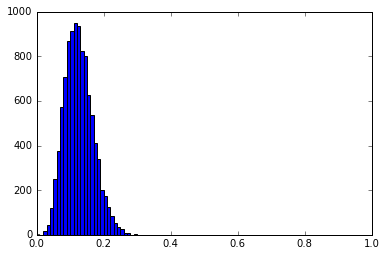

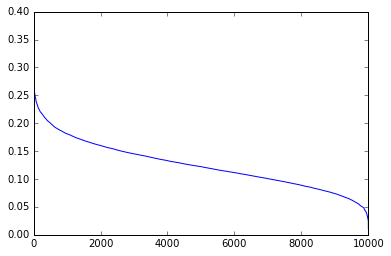

In [10]:
plt.figure()
plt.hist(dist_data[0],bins=np.arange(0,1,.01))
plt.figure()
plt.plot(dist_data[0].T)

## Generate the p-values for each network

[ 0.          0.13423151  0.05283867  0.07459954  0.29534467  0.19629558
  0.24669003]
[1.0, 0.15578442155784422, 0.80521947805219474, 0.855014498550145, 0.0039996000399960003, 0.59174082591740829, 0.24157584241575841]


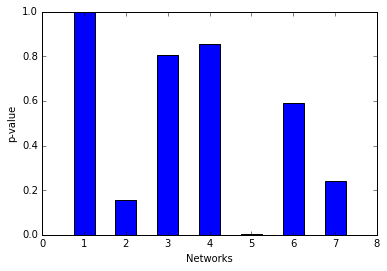

In [11]:
def getpval_old(nhit,dist_data):
    distribution_val =  np.histogram(dist_data,bins=np.arange(0,1,0.01))
    idx_bin = np.where((distribution_val[1]>=round(nhit,2)) & (distribution_val[1]<=round(nhit,2)))[0][0]
    #print distribution_val[1]
    return (np.sum(distribution_val[0][idx_bin:-1])+1)/(dist_data.shape[0]+1.)

def getpval(target,dist_data):
    dist_sorted = np.sort(np.copy(dist_data))
    b = np.sum(dist_sorted > target)
    #print b
    #print dist_data.shape[0]
    #print distribution_val[1]
    return ((b+1.)/(dist_data.shape[0]+1.))

print network_votes

pval_results=[]
for i in range(0,len(dist_data)):
    pval_results.append(getpval(network_votes[i],dist_data[i,:]))
    
print pval_results
plt.figure()
plt.bar(np.arange(1,len(pval_results)+1),pval_results,width=0.5,align='center')
plt.xlabel('Networks')
plt.ylabel('p-value')

### Map the p-values to the template

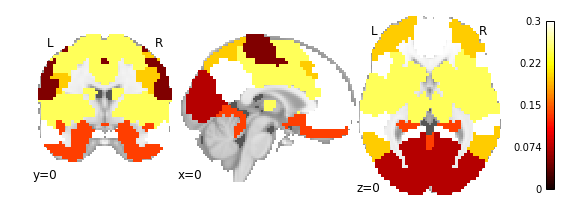

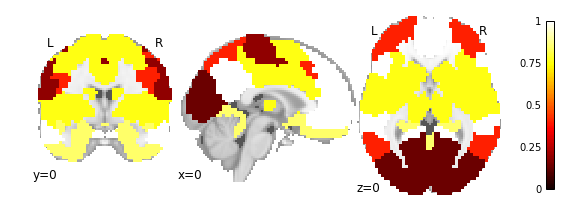

In [12]:
from proteus.matrix import tseries as ts
hitfreq_vol = ts.vec2map(network_votes,template)
pval_vol = ts.vec2map(1-np.array(pval_results),template)
plt.figure()
plotting.plot_stat_map(hitfreq_vol,cut_coords=(0,0,0),draw_cross=False)
plt.figure()
plotting.plot_stat_map(pval_vol,cut_coords=(0,0,0),draw_cross=False)


#### FDR correction of the p-values

In [13]:
# correct for FRD
from statsmodels.sandbox.stats.multicomp import fdrcorrection0

fdr_test,fdr_pval=fdrcorrection0(pval_results,alpha=0.05)
print network_votes
print fdr_test
print fdr_pval

[ 0.          0.13423151  0.05283867  0.07459954  0.29534467  0.19629558
  0.24669003]
[False False False False  True False False]
[ 1.          0.54524548  0.99751691  0.99751691  0.0279972   0.99751691
  0.56367697]


In [14]:
# save the results

path_output = '/home/cdansereau/git/Projects/metaad/maps_results/'
stats_results = {'Hits':network_votes ,'pvalues':pval_results,'fdr_test':fdr_test,'fdr_pval':fdr_pval,'n_outofbrain':n_outofbrain}
scipy.io.savemat(path_output + output_stats, stats_results)
hitfreq_vol.to_filename(os.path.join(path_output,output_vol))
#hitfreq_vol.to_filename(os.path.join('/home/cdansereau/git/Projects/metaad/maps_results/','AD_pval_vol.nii.gz'))

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

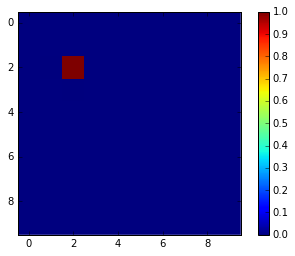

In [38]:
np.random.seed(123456789)
data = np.zeros((10, 10))
data[2,2] = 1
data
plt.imshow(data, interpolation='none')
plt.colorbar()
plt.clim((0, 1))

In [28]:
import scipy as sp

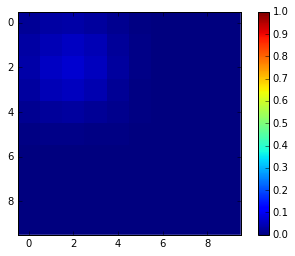

In [39]:
smoothed_data = scipy.ndimage.filters.gaussian_filter(data, 1.5)
plt.imshow(smoothed_data, interpolation='none')
plt.colorbar()
plt.clim((0, 1))

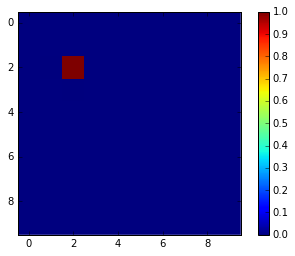

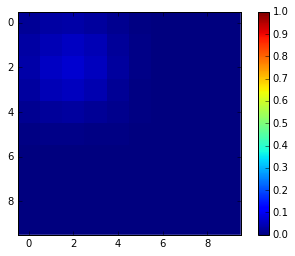

In [52]:
plot_matrix(data)
d2 = smooth_matrix(data, sigma=1.5)
plot_matrix(d2)

In [91]:
mni_space_targets = seed_data[['x','y','z']].values
vox_corrd = get_world2vox(template,mni_space_targets)
vox_coord

[[0, 0, 0],
 [0, 0, 1],
 [0, 0, 2],
 [0, 0, 3],
 [0, 0, 4],
 [0, 0, 5],
 [0, 0, 6],
 [0, 0, 7],
 [0, 0, 8],
 [0, 0, 9],
 [0, 0, 10],
 [0, 0, 11],
 [0, 0, 12],
 [0, 0, 13],
 [0, 0, 14],
 [0, 0, 15],
 [0, 0, 16],
 [0, 0, 17],
 [0, 0, 18],
 [0, 0, 19],
 [0, 0, 20],
 [0, 0, 21],
 [0, 0, 22],
 [0, 0, 23],
 [0, 0, 24],
 [0, 0, 25],
 [0, 0, 26],
 [0, 0, 27],
 [0, 0, 28],
 [0, 0, 29],
 [0, 0, 30],
 [0, 0, 31],
 [0, 0, 32],
 [0, 0, 33],
 [0, 0, 34],
 [0, 0, 35],
 [0, 0, 36],
 [0, 0, 37],
 [0, 0, 38],
 [0, 0, 39],
 [0, 0, 40],
 [0, 0, 41],
 [0, 0, 42],
 [0, 0, 43],
 [0, 0, 44],
 [0, 0, 45],
 [0, 0, 46],
 [0, 0, 47],
 [0, 0, 48],
 [0, 0, 49],
 [0, 0, 50],
 [0, 0, 51],
 [0, 1, 0],
 [0, 1, 1],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 4],
 [0, 1, 5],
 [0, 1, 6],
 [0, 1, 7],
 [0, 1, 8],
 [0, 1, 9],
 [0, 1, 10],
 [0, 1, 11],
 [0, 1, 12],
 [0, 1, 13],
 [0, 1, 14],
 [0, 1, 15],
 [0, 1, 16],
 [0, 1, 17],
 [0, 1, 18],
 [0, 1, 19],
 [0, 1, 20],
 [0, 1, 21],
 [0, 1, 22],
 [0, 1, 23],
 [0, 1, 24],
 [0, 1, 25],
 [0, 1